In [1]:
try:
    sc.stop()
except:
    print('no sc to stop')

In [2]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('PysparkRegression').setMaster('local[4]')
sc = SparkContext.getOrCreate(conf = conf)

from pyspark.sql import SparkSession 
from pyspark.sql.types import StructField, StringType, IntegerType, StructType

spark = SparkSession.builder.appName('PysparkRegression').getOrCreate()
sc


<SparkContext master=local[4] appName=PysparkRegression>

In [9]:
b_data_path = "/home/hadoop/data/Boston.csv"

df = spark.read.csv("file://{}".format(b_data_path), inferSchema=True, header=True)

In [10]:
""" CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's
    """

" CRIM - per capita crime rate by town\n    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n    INDUS - proportion of non-retail business acres per town.\n    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n    NOX - nitric oxides concentration (parts per 10 million)\n    RM - average number of rooms per dwelling\n    AGE - proportion of owner-occupied units built prior to 1940\n    DIS - weighted distances to five Boston employment centres\n    RAD - index of accessibility to radial highways\n    TAX - full-value property-tax rate per $10,000\n    PTRATIO - pupil-teacher ratio by town\n    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n    LSTAT - % lower status of the population\n    MEDV - Median value of owner-occupied homes in $1000's\n    "

In [11]:
df.schema, df.columns

(StructType(List(StructField(_c0,IntegerType,true),StructField(crim,DoubleType,true),StructField(zn,DoubleType,true),StructField(indus,DoubleType,true),StructField(chas,IntegerType,true),StructField(nox,DoubleType,true),StructField(rm,DoubleType,true),StructField(age,DoubleType,true),StructField(dis,DoubleType,true),StructField(rad,IntegerType,true),StructField(tax,IntegerType,true),StructField(ptratio,DoubleType,true),StructField(black,DoubleType,true),StructField(lstat,DoubleType,true),StructField(medv,DoubleType,true))),
 ['_c0',
  'crim',
  'zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'black',
  'lstat',
  'medv'])

In [12]:
df.show(5)

+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|  5|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [13]:
df.cache()

DataFrame[_c0: int, crim: double, zn: double, indus: double, chas: int, nox: double, rm: double, age: double, dis: double, rad: int, tax: int, ptratio: double, black: double, lstat: double, medv: double]

In [14]:
# Data manipulation

In [18]:
df.describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              _c0|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|             black|             lstat|              medv|
+-------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|              506|               506|               506|               506|               506|                50

In [17]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,506,253.5,146.2138844296259,1,506
crim,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
zn,506,11.363636363636363,23.32245299451514,0.0,100.0
indus,506,11.136778656126504,6.860352940897589,0.46,27.74
chas,506,0.0691699604743083,0.2539940413404101,0,1
nox,506,0.5546950592885372,0.11587767566755584,0.385,0.871
rm,506,6.284634387351787,0.7026171434153232,3.561,8.78
age,506,68.57490118577078,28.148861406903595,2.9,100.0
dis,506,3.795042687747034,2.10571012662761,1.1296,12.1265


In [20]:
from pyspark.mllib.stat import Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# result similar to pandas.DF.corr()

df.toPandas().corr()

,_c0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
_c0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [22]:
def compute_corr_matrix(df, method = 'pearson'):
    df_rdd = df.rdd.map( lambda r: r[0:] )
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat, columns=df.columns, index=df.columns)
    return(corr_mat_df)

In [23]:
compute_corr_matrix(df)

,_c0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
_c0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [35]:
df=df.drop('_c0')

In [36]:
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



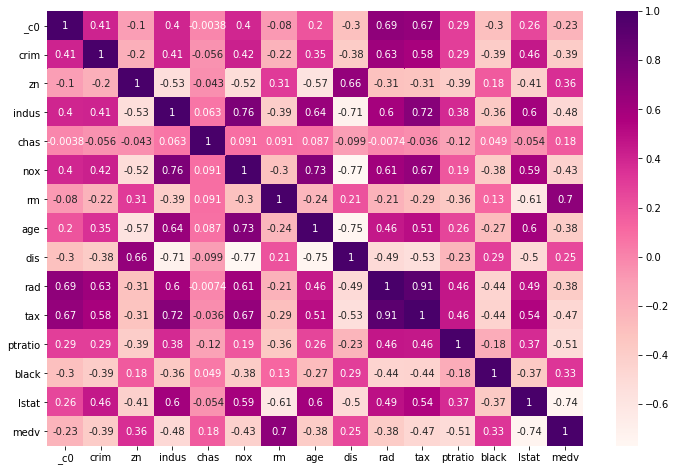

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(compute_corr_matrix(df), cmap='RdPu', annot=True)

In [37]:
compute_corr_matrix(df).unstack()

crim   crim       1.000000
       zn        -0.200469
       indus      0.406583
       chas      -0.055892
       nox        0.420972
       rm        -0.219247
       age        0.352734
       dis       -0.379670
       rad        0.625505
       tax        0.582764
       ptratio    0.289946
       black     -0.385064
       lstat      0.455621
       medv      -0.388305
zn     crim      -0.200469
       zn         1.000000
       indus     -0.533828
       chas      -0.042697
       nox       -0.516604
       rm         0.311991
       age       -0.569537
       dis        0.664408
       rad       -0.311948
       tax       -0.314563
       ptratio   -0.391679
       black      0.175520
       lstat     -0.412995
       medv       0.360445
indus  crim       0.406583
       zn        -0.533828
                    ...   
black  lstat     -0.366087
       medv       0.333461
lstat  crim       0.455621
       zn        -0.412995
       indus      0.603800
       chas      -0.053929
 

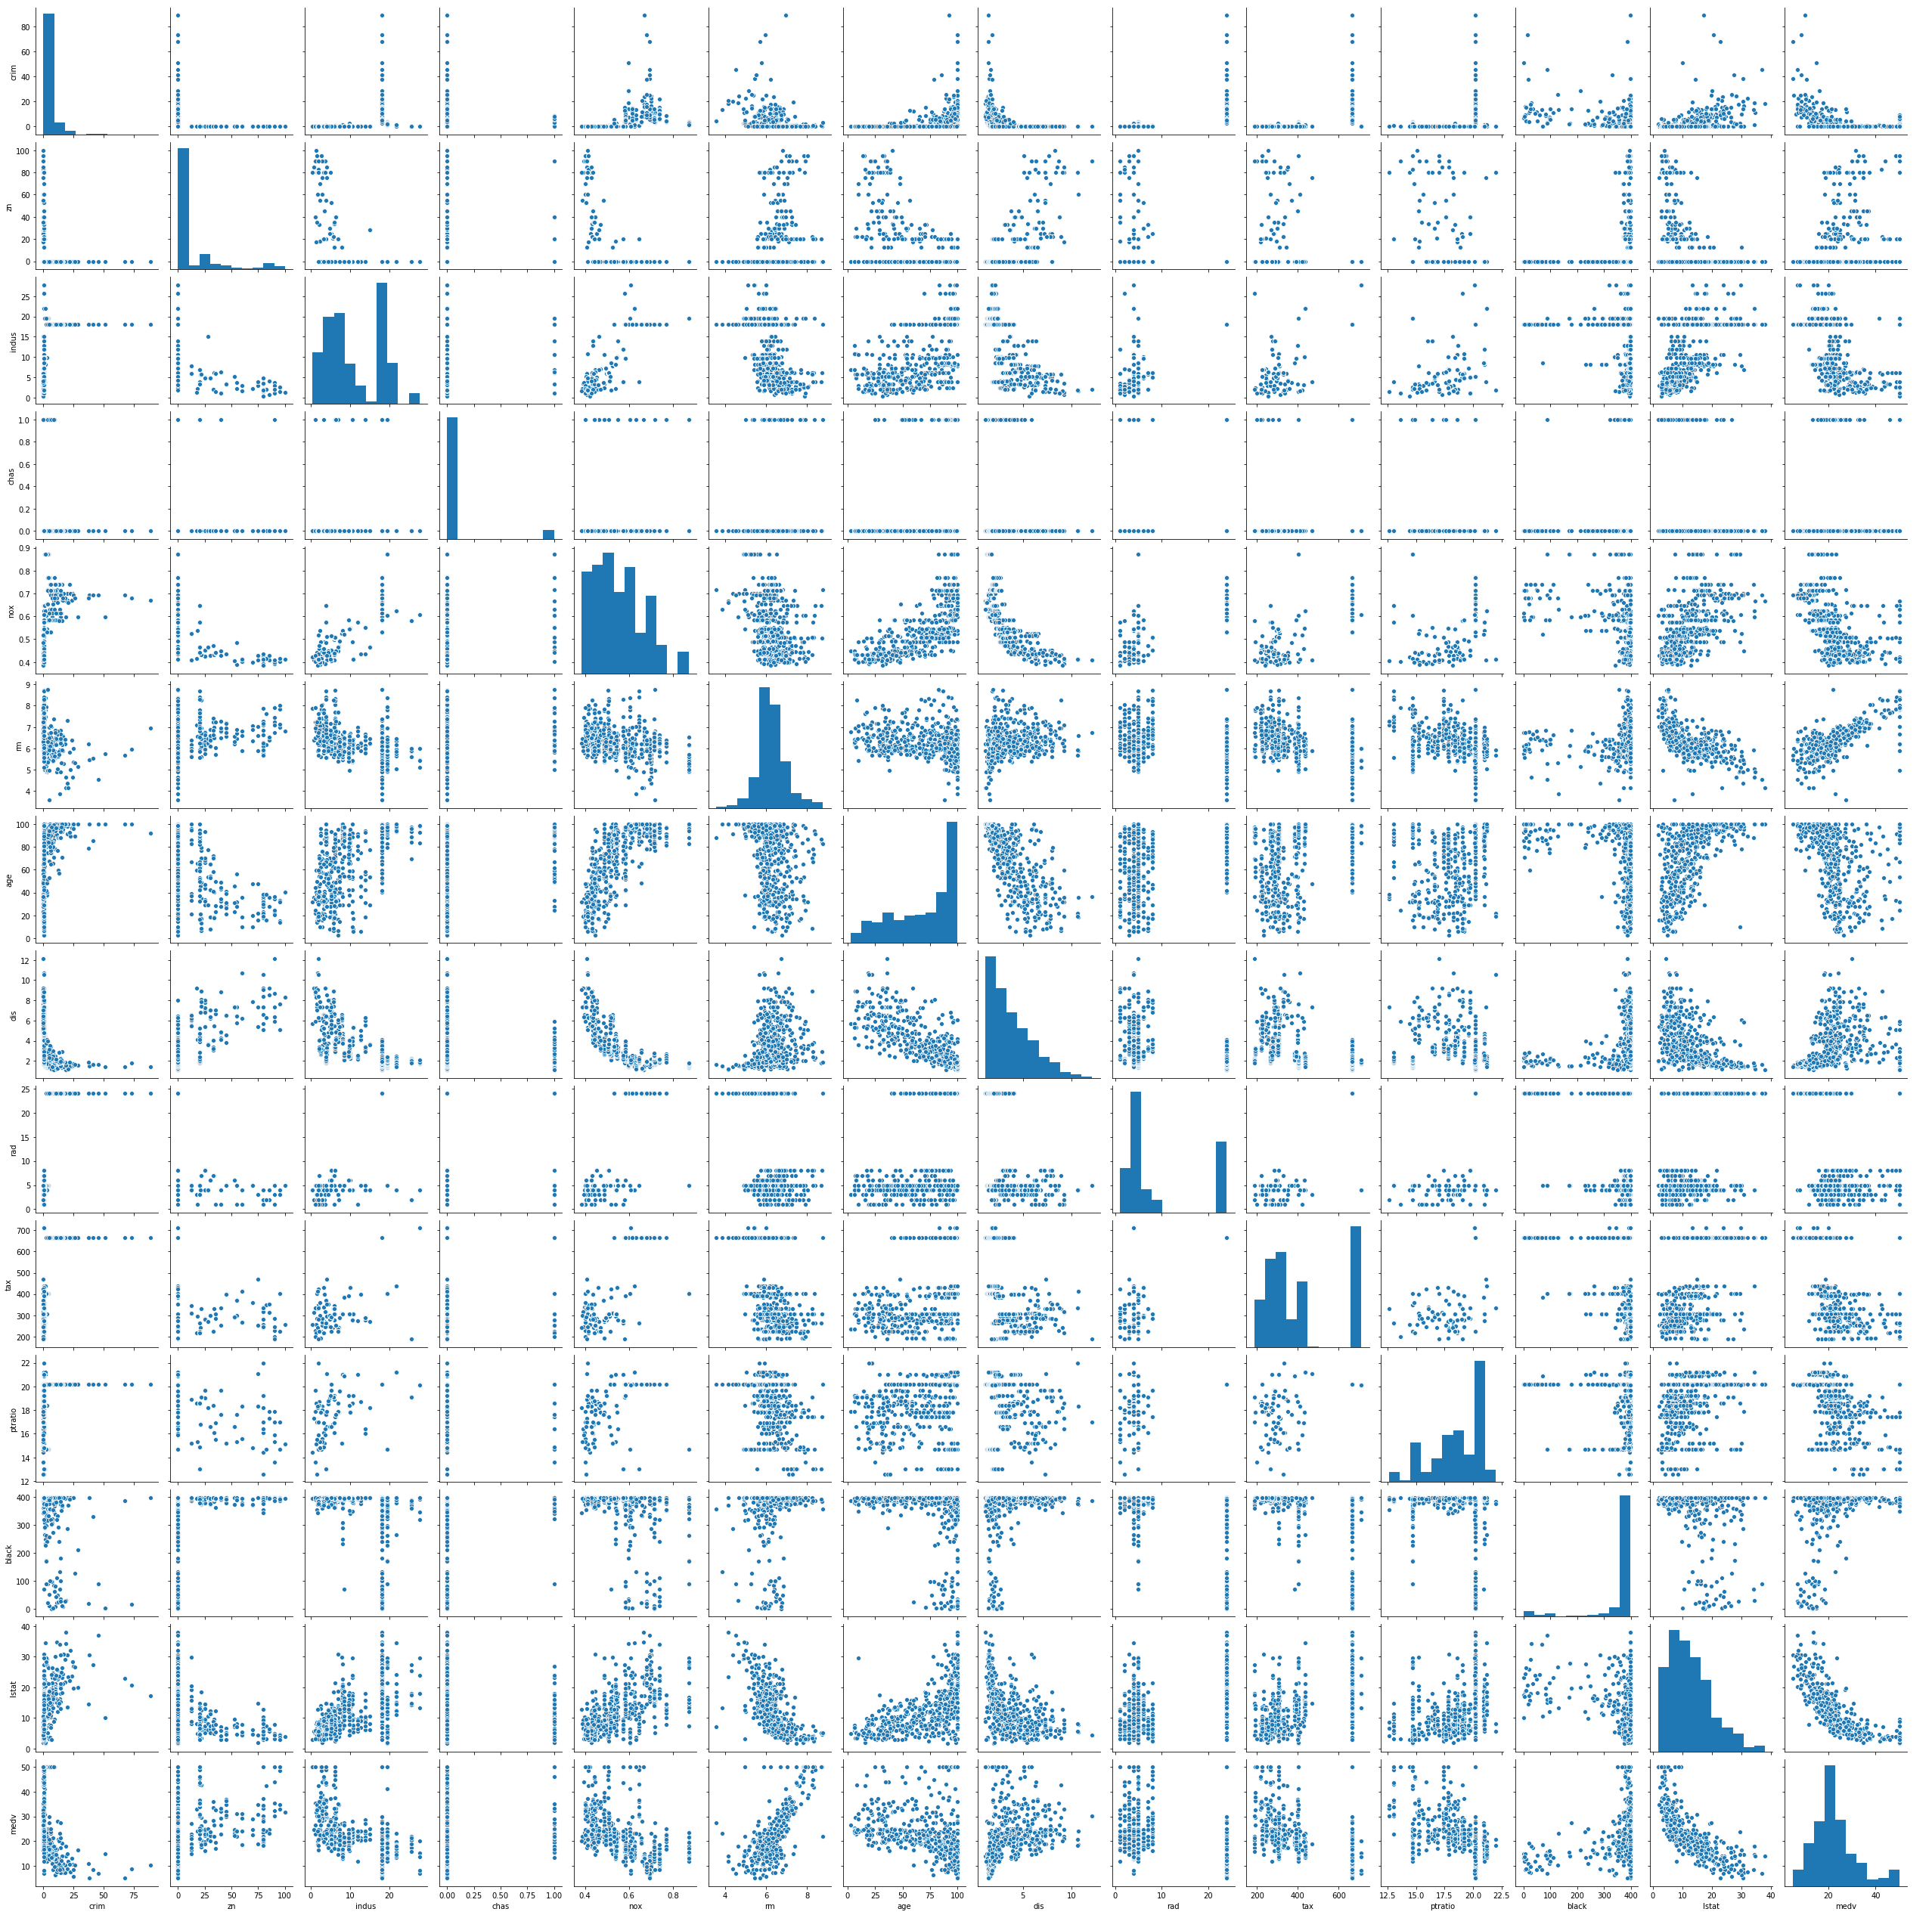

In [38]:
sns.pairplot(df.toPandas())

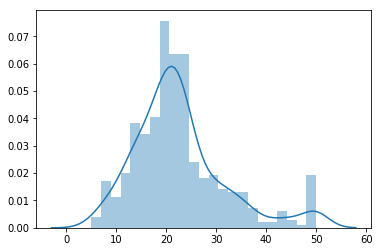

In [40]:
sns.distplot(df.select('medv').toPandas())

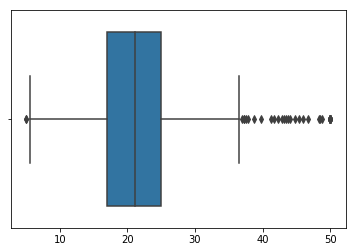

In [41]:
sns.boxplot(df.select('medv').toPandas())

In [45]:
#### Vectorizer

from pyspark.ml.feature import VectorAssembler


In [51]:
df.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [46]:
VectorAssembler??

In [79]:
v_a = VectorAssembler(
    inputCols=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'],
                    #inputCols=list(df.columns),
                      #inputCols=['crim','zn','indus',],
                      outputCol='features')

v_df = v_a.transform(df)
v_df.take(3)

[Row(crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0, features=DenseVector([0.0063, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98])),
 Row(crim=0.02731, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=6.421, age=78.9, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=396.9, lstat=9.14, medv=21.6, features=DenseVector([0.0273, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14])),
 Row(crim=0.02729, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=7.185, age=61.1, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=392.83, lstat=4.03, medv=34.7, features=DenseVector([0.0273, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03]))]

In [80]:
dv= v_df.select('features').take(1)[0]['features']
dv, type(dv)

(DenseVector([0.0063, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]),
 pyspark.ml.linalg.DenseVector)

In [81]:
v_df1 = v_df.select(['features','medv'])

In [82]:
v_df1.show(5)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
+--------------------+----+
only showing top 5 rows



In [83]:
#### Cross Validation - Avoid Overfitting of data


In [84]:
train_sample, test_sample = v_df.randomSplit([.8,.2])

In [85]:
train_sample.count(), test_sample.count()

(410, 96)

In [86]:
#### Linear Regression

In [93]:
from pyspark.ml.regression import LinearRegression

lr_reg = LinearRegression(featuresCol='features', labelCol = 'medv',
                          maxIter = 100, regParam= 0.3,
                          elasticNetParam= 0.7, )
lr_reg

LinearRegression_c76c910248cc

In [94]:
lr_model= lr_reg.fit(train_sample)

In [95]:
# lr_model??

In [96]:
lr_model.coefficients #beta1, beta2, beta3...

DenseVector([-0.0371, 0.0155, 0.0, 2.464, -10.2905, 4.0795, 0.0, -0.9429, 0.0185, 0.0, -0.8508, 0.0064, -0.5482])

In [97]:
trainingSummary = lr_model.summary

In [92]:
print("RMSE: %f " %trainingSummary.rootMeanSquaredError)
print("r2 %f" %trainingSummary.r2) # 0< r2 <1

RMSE: 5.003960 
r2 0.711965


In [98]:
lr_model.intercept #beta0

26.313853568071014

In [99]:
lr_model.summary.meanSquaredError

25.03961320934996

In [100]:
lr_model.summary.meanAbsoluteError

3.453514327445267

In [102]:
lr_predictions = lr_model.transform(test_sample)
lr_predictions.select('prediction', 'medv', 'features').show(10)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 30.82111260438384|24.0|[0.00632,18.0,2.3...|
|29.683627203981654|35.4|[0.01311,90.0,1.2...|
|38.717714236959054|50.0|[0.01381,80.0,0.4...|
|31.175067800188707|31.6|[0.01432,100.0,1....|
|30.938539085794847|29.1|[0.01439,60.0,2.9...|
| 27.09509462741039|24.5|[0.01501,80.0,2.0...|
|24.908678538701416|33.0|[0.01951,17.5,1.3...|
|31.487596015559696|31.1|[0.02187,60.0,2.9...|
| 25.04798165373527|26.6|[0.02899,40.0,1.2...|
| 21.95631708761244|20.6|[0.03306,0.0,5.19...|
+------------------+----+--------------------+
only showing top 10 rows



In [103]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol='prediction',
                                  labelCol='medv',metricName='r2')
print("R Squared (R2) on test data = %g" 
      %lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.774535


In [104]:
trainingSummary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  1.368467004877349|
| -5.602136205718601|
| 1.1532420975995947|
|  2.005422847695961|
|  7.944942591748692|
|   8.62635227024328|
|  4.985346854904989|
| 1.7682564569290555|
|-2.5094922251029494|
|0.04049721443354315|
| 10.069348301152736|
|-0.7727224699809554|
|  5.500502542916209|
| -9.484628639542805|
| -3.907250570342356|
|  3.401259383557811|
|   -3.8064531435957|
| 1.2784521639702753|
|-2.5623509637249313|
|  2.786641124420047|
+-------------------+
only showing top 20 rows

